In [1]:
pwd

'C:\\Users\\charl'

In [2]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2

# Load your dataset
df = pd.read_csv("C:\\Users\\charl\\Downloads\\bank-subscribed_19.csv")



In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1.0,-1.0,0.0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1.0,-1.0,0.0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1.0,-1.0,0.0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1.0,-1.0,0.0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1.0,-1.0,0.0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8036,45,services,married,secondary,no,759,yes,no,NaN,2,jun,172,2.0,-1.0,0.0,NaN,no
8037,29,management,single,tertiary,no,144,yes,no,NaN,2,jun,105,3.0,-1.0,0.0,NaN,no
8038,39,services,divorced,secondary,no,892,yes,no,NaN,2,jun,26,1.0,-1.0,0.0,NaN,no
8039,32,services,married,secondary,no,109,yes,no,NaN,2,jun,364,13.0,-1.0,0.0,NaN,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8041 entries, 0 to 8040
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        8041 non-null   int64  
 1   job        8019 non-null   object 
 2   marital    8041 non-null   object 
 3   education  7664 non-null   object 
 4   default    8041 non-null   object 
 5   balance    8041 non-null   int64  
 6   housing    8041 non-null   object 
 7   loan       8041 non-null   object 
 8   contact    0 non-null      float64
 9   day        8041 non-null   int64  
 10  month      8041 non-null   object 
 11  duration   8041 non-null   int64  
 12  campaign   8040 non-null   float64
 13  pdays      8040 non-null   float64
 14  previous   8040 non-null   float64
 15  poutcome   0 non-null      float64
 16  Target     8040 non-null   object 
dtypes: float64(5), int64(4), object(8)
memory usage: 1.0+ MB


In [5]:
df["housing"].value_counts()

yes    7244
no      797
Name: housing, dtype: int64

In [6]:
df["housing"].unique()

array(['yes', 'no'], dtype=object)

In [7]:
# To show the headers
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1.0,-1.0,0.0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1.0,-1.0,0.0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1.0,-1.0,0.0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1.0,-1.0,0.0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1.0,-1.0,0.0,NaN,no
5,35,management,married,tertiary,no,231,yes,no,NaN,5,may,139,1.0,-1.0,0.0,NaN,no
6,28,management,single,tertiary,no,447,yes,yes,NaN,5,may,217,1.0,-1.0,0.0,NaN,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,NaN,5,may,380,1.0,-1.0,0.0,NaN,no
8,58,retired,married,primary,no,121,yes,no,NaN,5,may,50,1.0,-1.0,0.0,NaN,no
9,43,technician,single,secondary,no,593,yes,no,NaN,5,may,55,1.0,-1.0,0.0,NaN,no


In [8]:
# To show the last rows
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
8036,45,services,married,secondary,no,759,yes,no,NaN,2,jun,172,2.0,-1.0,0.0,NaN,no
8037,29,management,single,tertiary,no,144,yes,no,NaN,2,jun,105,3.0,-1.0,0.0,NaN,no
8038,39,services,divorced,secondary,no,892,yes,no,NaN,2,jun,26,1.0,-1.0,0.0,NaN,no
8039,32,services,married,secondary,no,109,yes,no,NaN,2,jun,364,13.0,-1.0,0.0,NaN,no
8040,35,housemaid,single,tertiary,no,608,yes,yes,NaN,2,jun,227,NaN,NaN,NaN,NaN,NaN


In [9]:
# If I wish to see the first 10 row
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1.0,-1.0,0.0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1.0,-1.0,0.0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1.0,-1.0,0.0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1.0,-1.0,0.0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1.0,-1.0,0.0,NaN,no
5,35,management,married,tertiary,no,231,yes,no,NaN,5,may,139,1.0,-1.0,0.0,NaN,no
6,28,management,single,tertiary,no,447,yes,yes,NaN,5,may,217,1.0,-1.0,0.0,NaN,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,NaN,5,may,380,1.0,-1.0,0.0,NaN,no
8,58,retired,married,primary,no,121,yes,no,NaN,5,may,50,1.0,-1.0,0.0,NaN,no
9,43,technician,single,secondary,no,593,yes,no,NaN,5,may,55,1.0,-1.0,0.0,NaN,no


In [10]:
 #I want to see the last 10 rows
df.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
8031,39,admin.,single,secondary,no,2854,yes,no,NaN,2,jun,64,1.0,-1.0,0.0,NaN,no
8032,36,blue-collar,married,primary,no,1244,yes,no,NaN,2,jun,143,1.0,-1.0,0.0,NaN,no
8033,34,technician,married,tertiary,no,691,yes,yes,NaN,2,jun,70,1.0,-1.0,0.0,NaN,no
8034,36,services,married,primary,no,0,yes,no,NaN,2,jun,1036,1.0,-1.0,0.0,NaN,yes
8035,38,entrepreneur,married,secondary,no,3249,yes,no,NaN,2,jun,384,1.0,-1.0,0.0,NaN,no
8036,45,services,married,secondary,no,759,yes,no,NaN,2,jun,172,2.0,-1.0,0.0,NaN,no
8037,29,management,single,tertiary,no,144,yes,no,NaN,2,jun,105,3.0,-1.0,0.0,NaN,no
8038,39,services,divorced,secondary,no,892,yes,no,NaN,2,jun,26,1.0,-1.0,0.0,NaN,no
8039,32,services,married,secondary,no,109,yes,no,NaN,2,jun,364,13.0,-1.0,0.0,NaN,no
8040,35,housemaid,single,tertiary,no,608,yes,yes,NaN,2,jun,227,NaN,NaN,NaN,NaN,NaN


In [11]:
df=df.fillna('contact')


In [12]:
# I want to know how many columns my dataframes has, by using shap attribute
df.shape


(8041, 17)

In [13]:
import pandas as pd

# Assuming your DataFrame is named 'df'
n = 1000  # Number of rows to display
last_1000_rows = df.tail(n)

print(last_1000_rows)


      age          job   marital  education default  balance housing loan  \
7041   32   technician   married   tertiary      no     3538     yes   no   
7042   25  blue-collar   married  secondary      no      192     yes   no   
7043   55     services  divorced  secondary      no     2166     yes   no   
7044   33     services   married  secondary      no     -384     yes   no   
7045   45     services    single  secondary      no     1377     yes   no   
...   ...          ...       ...        ...     ...      ...     ...  ...   
8036   45     services   married  secondary      no      759     yes   no   
8037   29   management    single   tertiary      no      144     yes   no   
8038   39     services  divorced  secondary      no      892     yes   no   
8039   32     services   married  secondary      no      109     yes   no   
8040   35    housemaid    single   tertiary      no      608     yes  yes   

      contact  day month  duration campaign    pdays previous poutcome  \
7

# Attributes

In [14]:
# Index attribute
df.index

RangeIndex(start=0, stop=8041, step=1)

In [15]:
# columns attribute
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

# b. Check for Nan values in data and remove them using appropriate method, if any 


# Using a pivot method

In [16]:
import pandas as dp

df=dp.read_csv("C:\\Users\\charl\\Downloads\\bank-subscribed_19.csv")

In [17]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1.0,-1.0,0.0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1.0,-1.0,0.0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1.0,-1.0,0.0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1.0,-1.0,0.0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1.0,-1.0,0.0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8036,45,services,married,secondary,no,759,yes,no,NaN,2,jun,172,2.0,-1.0,0.0,NaN,no
8037,29,management,single,tertiary,no,144,yes,no,NaN,2,jun,105,3.0,-1.0,0.0,NaN,no
8038,39,services,divorced,secondary,no,892,yes,no,NaN,2,jun,26,1.0,-1.0,0.0,NaN,no
8039,32,services,married,secondary,no,109,yes,no,NaN,2,jun,364,13.0,-1.0,0.0,NaN,no


In [18]:
df.shape

(8041, 17)

In [19]:
# If the values are 8041 it means they are nan there,
# lets take a look at the job(8019), education(7664),contact(0,),campaign,pdays,privious all with (8040) which has non value,and poutcome(0),
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8041 entries, 0 to 8040
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        8041 non-null   int64  
 1   job        8019 non-null   object 
 2   marital    8041 non-null   object 
 3   education  7664 non-null   object 
 4   default    8041 non-null   object 
 5   balance    8041 non-null   int64  
 6   housing    8041 non-null   object 
 7   loan       8041 non-null   object 
 8   contact    0 non-null      float64
 9   day        8041 non-null   int64  
 10  month      8041 non-null   object 
 11  duration   8041 non-null   int64  
 12  campaign   8040 non-null   float64
 13  pdays      8040 non-null   float64
 14  previous   8040 non-null   float64
 15  poutcome   0 non-null      float64
 16  Target     8040 non-null   object 
dtypes: float64(5), int64(4), object(8)
memory usage: 1.0+ MB


In [20]:
df.describe()

,age,balance,contact,day,duration,campaign,pdays,previous,poutcome
count,8041.000000,8041.000000,0.0,8041.000000,8041.000000,8040.000000,8040.0,8040.0,0.0
mean,39.446835,1012.994901,NaN,17.554409,264.993160,2.538557,-1.0,0.0,NaN
std,9.244936,2470.228317,NaN,8.285143,249.772337,2.850901,0.0,0.0,NaN
min,20.000000,-3372.000000,NaN,2.000000,0.000000,1.000000,-1.0,0.0,NaN
25%,32.000000,40.000000,NaN,9.000000,118.000000,1.000000,-1.0,0.0,NaN
50%,38.000000,323.000000,NaN,16.000000,193.000000,2.000000,-1.0,0.0,NaN
75%,46.000000,1026.000000,NaN,26.000000,322.000000,3.000000,-1.0,0.0,NaN
max,61.000000,58544.000000,NaN,30.000000,3366.000000,63.000000,-1.0,0.0,NaN


In [21]:
df.isnull().sum()

age             0
job            22
marital         0
education     377
default         0
balance         0
housing         0
loan            0
contact      8041
day             0
month           0
duration        0
campaign        1
pdays           1
previous        1
poutcome     8041
Target          1
dtype: int64

In [22]:
print(df.dropna())

Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, Target]
Index: []


In [23]:
# this show that all the NaN has been drop especially when dropna is not working
df.dropna(subset=['job','education','contact','campaign','previous','poutcome','Target'], inplace=True)


In [24]:
df.isnull().sum()

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
Target       0.0
dtype: float64

In [25]:
df=df.fillna(0)

In [26]:
df=df.dropna(how='all').dropna(how='all', axis=1)

In [27]:
df.dropna(inplace=True)

In [28]:
df

""


In [29]:
#now we can see the are 8041x15 not(6796x15)
df.dropna

<bound method DataFrame.dropna of Empty DataFrame
Columns: []
Index: []>

In [30]:
df.dropna(inplace=True)

In [31]:
df

""


# Section 2

# Q2
# a) Check for duplicates, view duplicated rows, and remove them, if any.

In [32]:
import pandas as dp
import pandas as pd
df=pd.read_csv("C:\\Users\\charl\\Downloads\\bank-subscribed_19.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1.0,-1.0,0.0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1.0,-1.0,0.0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1.0,-1.0,0.0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1.0,-1.0,0.0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1.0,-1.0,0.0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8036,45,services,married,secondary,no,759,yes,no,NaN,2,jun,172,2.0,-1.0,0.0,NaN,no
8037,29,management,single,tertiary,no,144,yes,no,NaN,2,jun,105,3.0,-1.0,0.0,NaN,no
8038,39,services,divorced,secondary,no,892,yes,no,NaN,2,jun,26,1.0,-1.0,0.0,NaN,no
8039,32,services,married,secondary,no,109,yes,no,NaN,2,jun,364,13.0,-1.0,0.0,NaN,no


In [33]:
print( df)

      age           job   marital  education default  balance housing loan  \
0      58    management   married   tertiary      no     2143     yes   no   
1      44    technician    single  secondary      no       29     yes   no   
2      33  entrepreneur   married  secondary      no        2     yes  yes   
3      47   blue-collar   married        NaN      no     1506     yes   no   
4      33           NaN    single        NaN      no        1      no   no   
...   ...           ...       ...        ...     ...      ...     ...  ...   
8036   45      services   married  secondary      no      759     yes   no   
8037   29    management    single   tertiary      no      144     yes   no   
8038   39      services  divorced  secondary      no      892     yes   no   
8039   32      services   married  secondary      no      109     yes   no   
8040   35     housemaid    single   tertiary      no      608     yes  yes   

      contact  day month  duration  campaign  pdays  previous  

In [34]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8036    False
8037    False
8038    False
8039    False
8040    False
Length: 8041, dtype: bool

In [35]:
df.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
8036    False
8037    False
8038    False
8039    False
8040    False
Length: 8041, dtype: bool>

In [36]:
duplicates = df[df.duplicated(keep=False)]

In [37]:
print(duplicates)

Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, Target]
Index: []


In [38]:
df = df.drop_duplicates()

In [39]:
df.isna()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
3,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False
4,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8036,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
8037,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
8038,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
8039,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False


In [40]:
df.loc[df.duplicated(subset=['job','contact','poutcome'])] .head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
5,35,management,married,tertiary,no,231,yes,no,NaN,5,may,139,1.0,-1.0,0.0,NaN,no
6,28,management,single,tertiary,no,447,yes,yes,NaN,5,may,217,1.0,-1.0,0.0,NaN,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,NaN,5,may,380,1.0,-1.0,0.0,NaN,no
9,43,technician,single,secondary,no,593,yes,no,NaN,5,may,55,1.0,-1.0,0.0,NaN,no
11,29,admin.,single,secondary,no,390,yes,no,NaN,5,may,137,1.0,-1.0,0.0,NaN,no


In [41]:
#Checking an example duplicate and  you can see that there are 1208x17 and most of the value are not adentical
df.query('job=="management"')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1.0,-1.0,0.0,NaN,no
5,35,management,married,tertiary,no,231,yes,no,NaN,5,may,139,1.0,-1.0,0.0,NaN,no
6,28,management,single,tertiary,no,447,yes,yes,NaN,5,may,217,1.0,-1.0,0.0,NaN,no
21,56,management,married,tertiary,no,779,yes,no,NaN,5,may,164,1.0,-1.0,0.0,NaN,no
26,39,management,single,tertiary,no,255,yes,no,NaN,5,may,296,1.0,-1.0,0.0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8011,24,management,single,secondary,no,86,no,no,NaN,2,jun,1075,2.0,-1.0,0.0,NaN,no
8014,39,management,married,tertiary,no,2763,yes,no,NaN,2,jun,526,2.0,-1.0,0.0,NaN,yes
8020,32,management,single,secondary,no,249,yes,no,NaN,2,jun,258,1.0,-1.0,0.0,NaN,no
8024,32,management,single,NaN,no,3044,yes,no,NaN,2,jun,651,1.0,-1.0,0.0,NaN,no


In [42]:
# lets look at the subet of columns that are duplicated
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

In [43]:
df=df.loc[-df.duplicated(subset=['job','marital','education','balance','housing'])]\
.reset_index(drop=True).copy()
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1.0,-1.0,0.0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1.0,-1.0,0.0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1.0,-1.0,0.0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1.0,-1.0,0.0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1.0,-1.0,0.0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7180,38,entrepreneur,married,secondary,no,3249,yes,no,NaN,2,jun,384,1.0,-1.0,0.0,NaN,no
7181,45,services,married,secondary,no,759,yes,no,NaN,2,jun,172,2.0,-1.0,0.0,NaN,no
7182,29,management,single,tertiary,no,144,yes,no,NaN,2,jun,105,3.0,-1.0,0.0,NaN,no
7183,39,services,divorced,secondary,no,892,yes,no,NaN,2,jun,26,1.0,-1.0,0.0,NaN,no


In [44]:
print(df.isnull().sum())

age             0
job            22
marital         0
education     369
default         0
balance         0
housing         0
loan            0
contact      7185
day             0
month           0
duration        0
campaign        1
pdays           1
previous        1
poutcome     7185
Target          1
dtype: int64


In [45]:
df['balance']

0       2143
1         29
2          2
3       1506
4          1
        ... 
7180    3249
7181     759
7182     144
7183     892
7184     608
Name: balance, Length: 7185, dtype: int64

In [46]:
# This to count how many unit values are there
df['balance'].value_counts()

 0       105
 1        25
 2        19
 6        18
 3        17
        ... 
 1688      1
-507       1
 5558      1
 8837      1
 3249      1
Name: balance, Length: 3076, dtype: int64

In [47]:
# let look at the first 10 rows
df['balance'].value_counts()\
.head(10)

0     105
1      25
2      19
6      18
3      17
4      16
5      16
8      15
89     14
91     14
Name: balance, dtype: int64

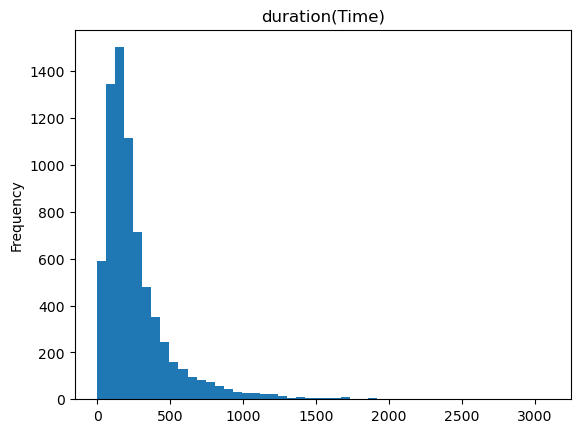

In [48]:
ax=df['duration'].plot(kind='hist',bins=50, title='duration(Time)')




# 2b Check for outliers using boxplot and statistical method, and remove them , if any

In [49]:
df=df.loc[-df.duplicated(subset=['job','marital','education','balance','housing'])]\
.reset_index(drop=True).copy()
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1.0,-1.0,0.0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1.0,-1.0,0.0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1.0,-1.0,0.0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1.0,-1.0,0.0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1.0,-1.0,0.0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7180,38,entrepreneur,married,secondary,no,3249,yes,no,NaN,2,jun,384,1.0,-1.0,0.0,NaN,no
7181,45,services,married,secondary,no,759,yes,no,NaN,2,jun,172,2.0,-1.0,0.0,NaN,no
7182,29,management,single,tertiary,no,144,yes,no,NaN,2,jun,105,3.0,-1.0,0.0,NaN,no
7183,39,services,divorced,secondary,no,892,yes,no,NaN,2,jun,26,1.0,-1.0,0.0,NaN,no


In [50]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1.0,-1.0,0.0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1.0,-1.0,0.0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1.0,-1.0,0.0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1.0,-1.0,0.0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1.0,-1.0,0.0,NaN,no


In [51]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
7180,38,entrepreneur,married,secondary,no,3249,yes,no,NaN,2,jun,384,1.0,-1.0,0.0,NaN,no
7181,45,services,married,secondary,no,759,yes,no,NaN,2,jun,172,2.0,-1.0,0.0,NaN,no
7182,29,management,single,tertiary,no,144,yes,no,NaN,2,jun,105,3.0,-1.0,0.0,NaN,no
7183,39,services,divorced,secondary,no,892,yes,no,NaN,2,jun,26,1.0,-1.0,0.0,NaN,no
7184,35,housemaid,single,tertiary,no,608,yes,yes,NaN,2,jun,227,NaN,NaN,NaN,NaN,NaN


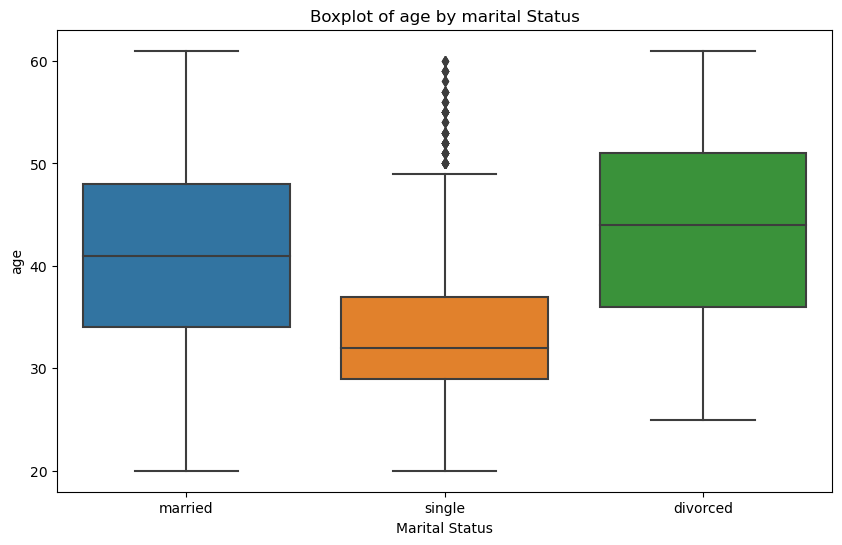

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df

# Drop rows with missing values in 'marital' or 'age' columns
df_cleaned = df.dropna(subset=['marital', 'age'])

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='marital', y='age', data=df_cleaned)
plt.title('Boxplot of age by marital Status')
plt.xlabel('Marital Status')
plt.ylabel('age')
plt.show()


In [53]:
df.head(10)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1.0,-1.0,0.0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1.0,-1.0,0.0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1.0,-1.0,0.0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1.0,-1.0,0.0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1.0,-1.0,0.0,NaN,no
5,35,management,married,tertiary,no,231,yes,no,NaN,5,may,139,1.0,-1.0,0.0,NaN,no
6,28,management,single,tertiary,no,447,yes,yes,NaN,5,may,217,1.0,-1.0,0.0,NaN,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,NaN,5,may,380,1.0,-1.0,0.0,NaN,no
8,58,retired,married,primary,no,121,yes,no,NaN,5,may,50,1.0,-1.0,0.0,NaN,no
9,43,technician,single,secondary,no,593,yes,no,NaN,5,may,55,1.0,-1.0,0.0,NaN,no


In [54]:
df.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
7175,35,services,divorced,secondary,no,440,yes,no,NaN,2,jun,101,1.0,-1.0,0.0,NaN,no
7176,44,services,married,secondary,no,808,yes,no,NaN,2,jun,67,2.0,-1.0,0.0,NaN,no
7177,39,admin.,single,secondary,no,2854,yes,no,NaN,2,jun,64,1.0,-1.0,0.0,NaN,no
7178,36,blue-collar,married,primary,no,1244,yes,no,NaN,2,jun,143,1.0,-1.0,0.0,NaN,no
7179,34,technician,married,tertiary,no,691,yes,yes,NaN,2,jun,70,1.0,-1.0,0.0,NaN,no
7180,38,entrepreneur,married,secondary,no,3249,yes,no,NaN,2,jun,384,1.0,-1.0,0.0,NaN,no
7181,45,services,married,secondary,no,759,yes,no,NaN,2,jun,172,2.0,-1.0,0.0,NaN,no
7182,29,management,single,tertiary,no,144,yes,no,NaN,2,jun,105,3.0,-1.0,0.0,NaN,no
7183,39,services,divorced,secondary,no,892,yes,no,NaN,2,jun,26,1.0,-1.0,0.0,NaN,no
7184,35,housemaid,single,tertiary,no,608,yes,yes,NaN,2,jun,227,NaN,NaN,NaN,NaN,NaN


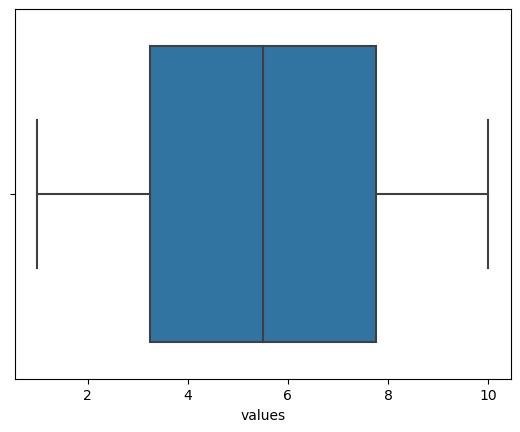

In [55]:
import seaborn as sns
import pandas as pd

# Create a sample dataset (replace this with your own data)
data = pd.DataFrame({'values': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

# Create a box plot using seaborn
sns.boxplot(x='values', data=data)

# Show the plot
import matplotlib.pyplot as plt
plt.show()


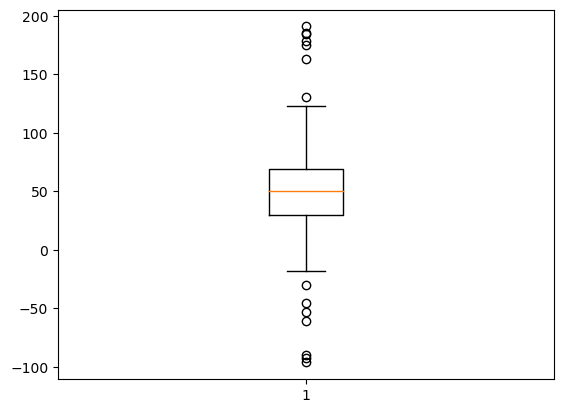

In [56]:
from pylab import *
spread= rand(50) * 100
center = ones(25) * 50
flier_high = rand(10) * 100 + 100
flier_low = rand(10) * -100
data =concatenate((spread, center, flier_high, flier_low), 0)
r = boxplot(data)

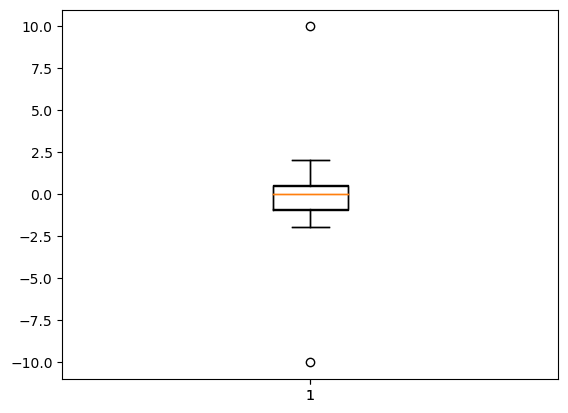

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# Generate example data with outliers
data = np.concatenate([np.random.normal(0, 1, 50), [10, -10]])

# Create a box plot
plt.boxplot(data)

# Identify outliers using IQR method
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify and remove outliers
outliers = [x for x in data if x < lower_bound or x > upper_bound]
data_no_outliers = [x for x in data if x >= lower_bound and x <= upper_bound]

# Create a box plot without outliers
plt.boxplot(data_no_outliers)

plt.show()

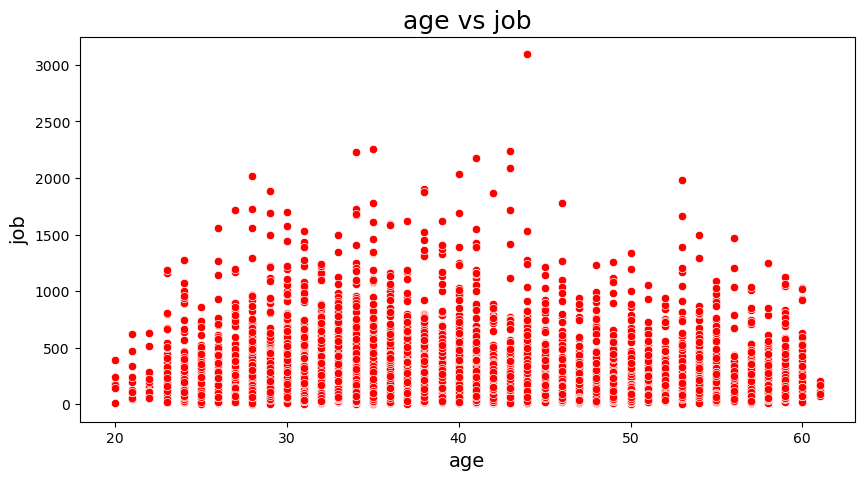

In [58]:
plt.figure(figsize= (10,5))
sns.scatterplot(x='age',y='duration',color='r',data=df)
plt.title('age vs job',size=18)
plt.xlabel('age',size=14)
plt.ylabel('job',size=14)
plt.show()

<Axes: xlabel='age', ylabel='marital'>

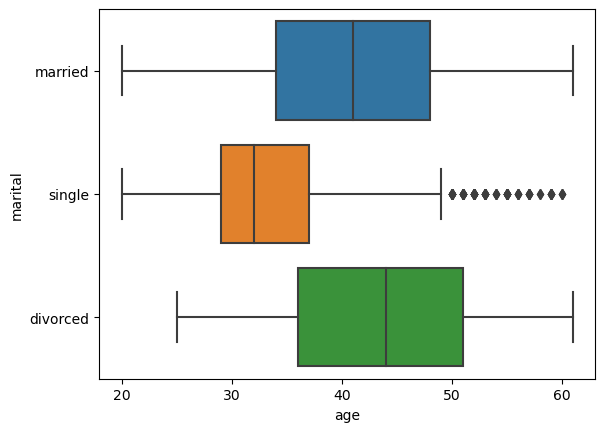

In [59]:
sns.boxplot(x='age',y='marital',data=df)

<Axes: ylabel='age'>

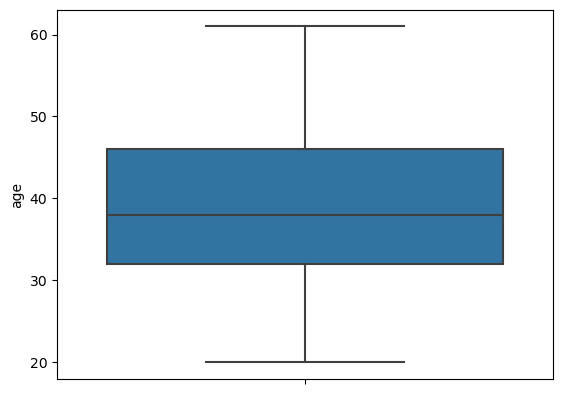

In [60]:
sns.boxplot(y='age',data=df)

In [61]:
df['age'].mean()

39.57188587334725

In [62]:
df1=df[df['age']<68]

<Axes: xlabel='marital', ylabel='age'>

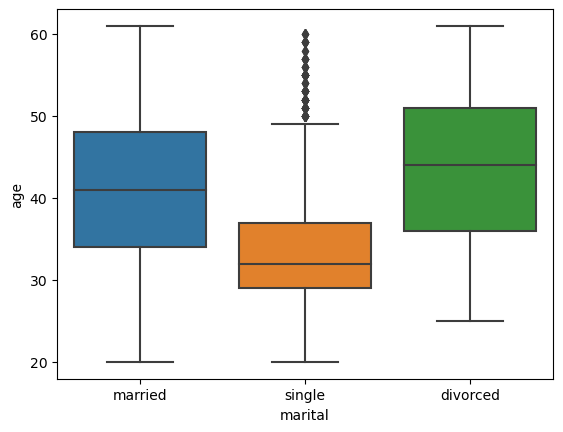

In [63]:
sns.boxplot(x='marital',y='age',data=df1)

In [64]:
df['age'].mean()

39.57188587334725

In [65]:
#max-thresold=df['Age'].quantile(0.25)
#max_thresold

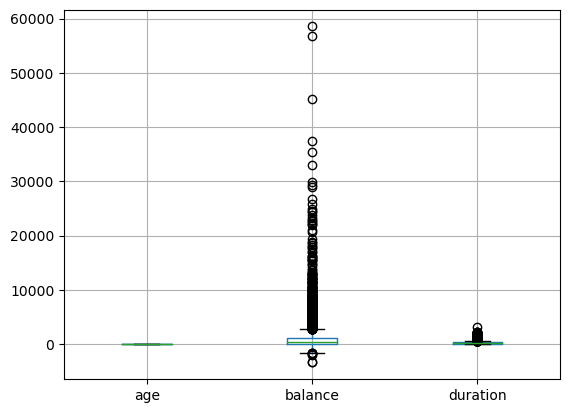

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have your DataFrame loaded as 'df'

# Create boxplots for selected numeric columns
numeric_columns = ['age', 'balance', 'duration']  # Replace with your column names
df[numeric_columns].boxplot()
plt.show()

In [67]:
import pandas as pd


In [68]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1.0,-1.0,0.0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1.0,-1.0,0.0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1.0,-1.0,0.0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1.0,-1.0,0.0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1.0,-1.0,0.0,NaN,no


In [69]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
7180,38,entrepreneur,married,secondary,no,3249,yes,no,NaN,2,jun,384,1.0,-1.0,0.0,NaN,no
7181,45,services,married,secondary,no,759,yes,no,NaN,2,jun,172,2.0,-1.0,0.0,NaN,no
7182,29,management,single,tertiary,no,144,yes,no,NaN,2,jun,105,3.0,-1.0,0.0,NaN,no
7183,39,services,divorced,secondary,no,892,yes,no,NaN,2,jun,26,1.0,-1.0,0.0,NaN,no
7184,35,housemaid,single,tertiary,no,608,yes,yes,NaN,2,jun,227,NaN,NaN,NaN,NaN,NaN


<Axes: >

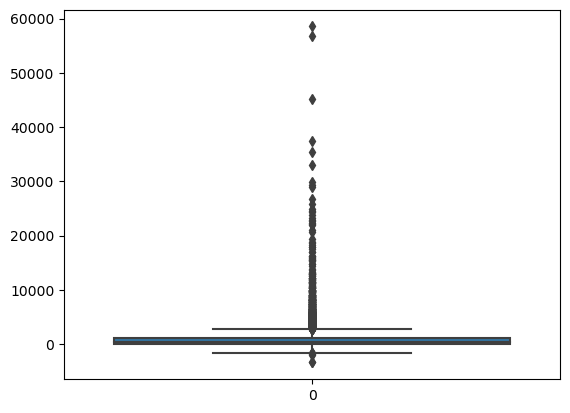

In [70]:
sns.boxplot(df['balance'])

In [71]:
# my observation is from 20000 till 6000 that has it outliers.

In [72]:
print(df.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')


# C For categorical features, draw countplot. Write your observations. 

In [73]:
df.describe()


,age,balance,contact,day,duration,campaign,pdays,previous,poutcome
count,7185.000000,7185.000000,0.0,7185.000000,7185.000000,7184.000000,7184.0,7184.0,0.0
mean,39.571886,1113.452331,NaN,17.351287,266.224078,2.522411,-1.0,0.0,NaN
std,9.303853,2591.613224,NaN,8.301355,248.896295,2.863802,0.0,0.0,NaN
min,20.000000,-3372.000000,NaN,2.000000,0.000000,1.000000,-1.0,0.0,NaN
25%,32.000000,74.000000,NaN,9.000000,118.000000,1.000000,-1.0,0.0,NaN
50%,38.000000,387.000000,NaN,16.000000,193.000000,2.000000,-1.0,0.0,NaN
75%,46.000000,1161.000000,NaN,26.000000,323.000000,3.000000,-1.0,0.0,NaN
max,61.000000,58544.000000,NaN,30.000000,3094.000000,63.000000,-1.0,0.0,NaN


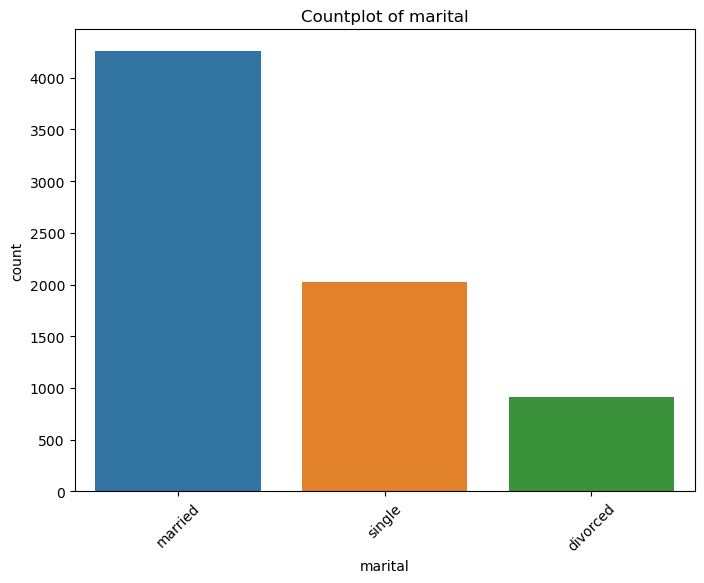

married     4254
single      2020
divorced     911
Name: marital, dtype: int64


In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data into a DataFrame (assuming you've named it 'df')
# df = ...

# Select the categorical column to visualize
categorical_column = 'marital'

# Create a countplot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x=categorical_column)
plt.title(f'Countplot of {categorical_column}')
plt.xticks(rotation=45)
plt.show()

# Print value counts
print(df[categorical_column].value_counts())

married     4254
single      2020
divorced     911
Name: marital, dtype: int64


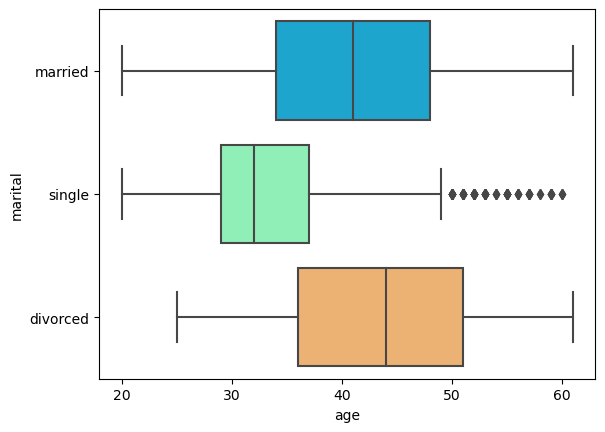

In [75]:
sns.boxplot(x='age', y='marital',data=df,palette='rainbow')
print(df[categorical_column].value_counts())

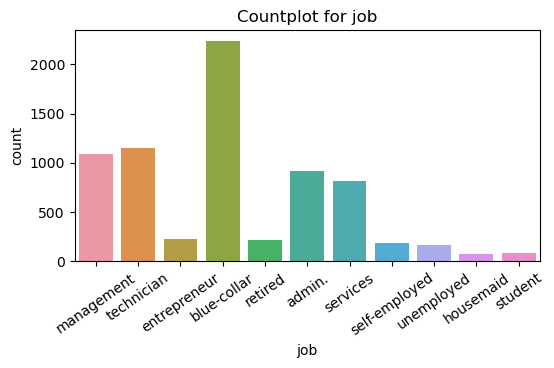

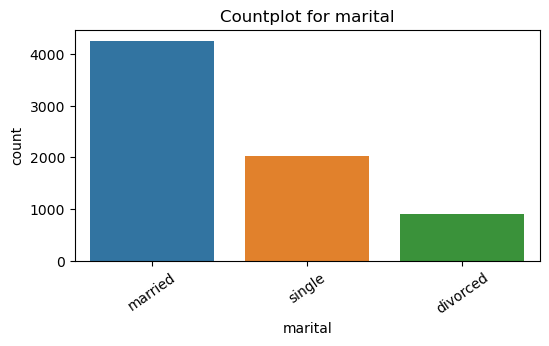

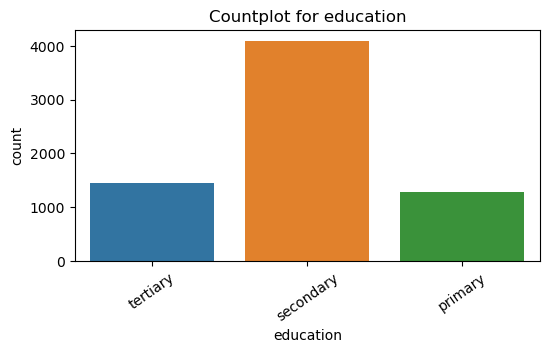

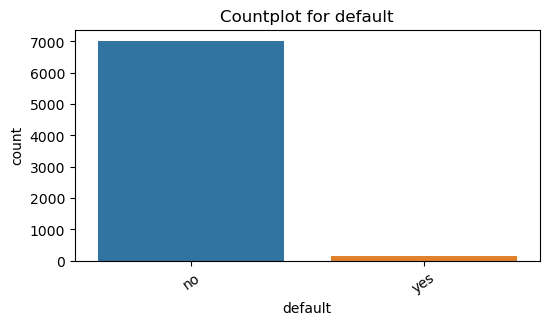

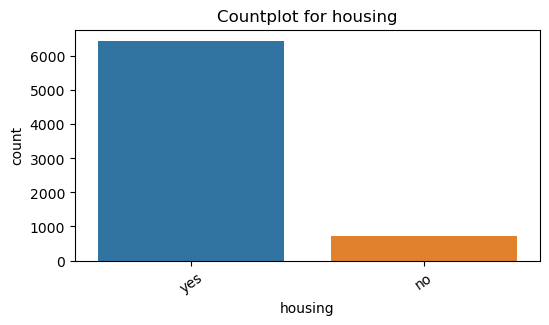

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a list of categorical column names
categorical_columns = ['job', 'marital', 'education', 'default', 'housing',]

# Create count plots for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(6, 3))
    sns.countplot(x=column, data=df)
    plt.title(f'Countplot for {column}')
    plt.xticks(rotation=35)
    plt.show()


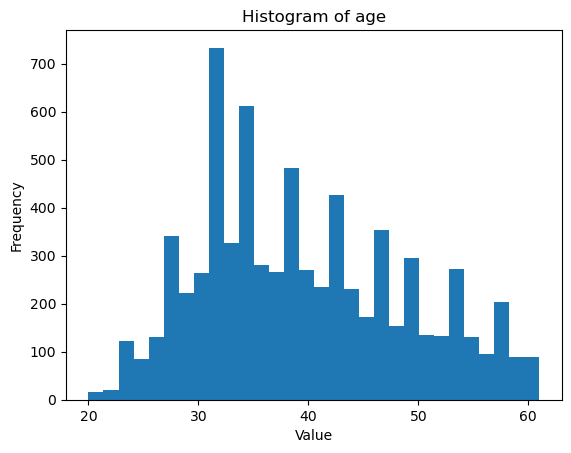

In [77]:
# Assuming you have your DataFrame loaded as 'df'
numeric_column_name = 'age'  # Replace with your column name

plt.hist(df[numeric_column_name], bins=30)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title(f'Histogram of {numeric_column_name}')
plt.show()

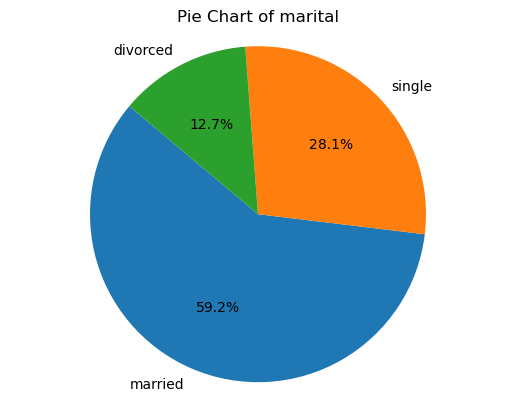

In [78]:
# Assuming you have your DataFrame loaded as 'df'
categorical_column_name = 'marital'  # Replace with your column name

marital_counts = df[categorical_column_name].value_counts()
plt.pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Pie Chart of {categorical_column_name}')
plt.axis('equal')
plt.show()

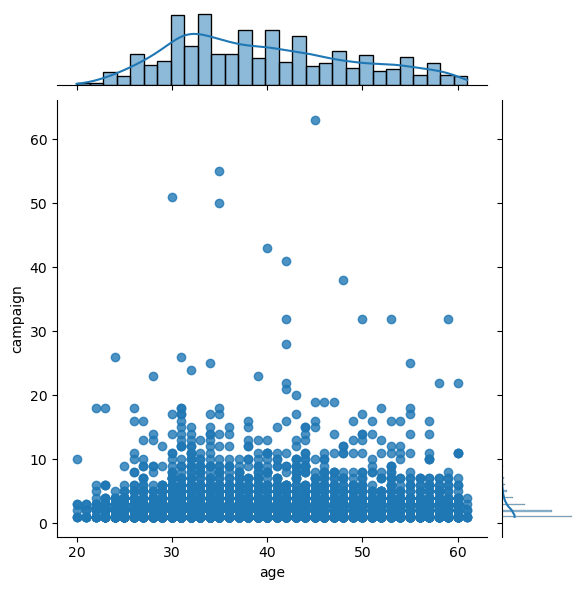

In [79]:
#Jointplot

sns.jointplot(x='age',y='campaign',data=df,kind='reg')

# 2D For numeric features, draw a histogram. Compute and about skewness of variables and apply transformation function,

In [80]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1.0,-1.0,0.0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1.0,-1.0,0.0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1.0,-1.0,0.0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1.0,-1.0,0.0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1.0,-1.0,0.0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7180,38,entrepreneur,married,secondary,no,3249,yes,no,NaN,2,jun,384,1.0,-1.0,0.0,NaN,no
7181,45,services,married,secondary,no,759,yes,no,NaN,2,jun,172,2.0,-1.0,0.0,NaN,no
7182,29,management,single,tertiary,no,144,yes,no,NaN,2,jun,105,3.0,-1.0,0.0,NaN,no
7183,39,services,divorced,secondary,no,892,yes,no,NaN,2,jun,26,1.0,-1.0,0.0,NaN,no


In [81]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1.0,-1.0,0.0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1.0,-1.0,0.0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1.0,-1.0,0.0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1.0,-1.0,0.0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1.0,-1.0,0.0,NaN,no


In [82]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1.0,-1.0,0.0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1.0,-1.0,0.0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1.0,-1.0,0.0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1.0,-1.0,0.0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1.0,-1.0,0.0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7180,38,entrepreneur,married,secondary,no,3249,yes,no,NaN,2,jun,384,1.0,-1.0,0.0,NaN,no
7181,45,services,married,secondary,no,759,yes,no,NaN,2,jun,172,2.0,-1.0,0.0,NaN,no
7182,29,management,single,tertiary,no,144,yes,no,NaN,2,jun,105,3.0,-1.0,0.0,NaN,no
7183,39,services,divorced,secondary,no,892,yes,no,NaN,2,jun,26,1.0,-1.0,0.0,NaN,no


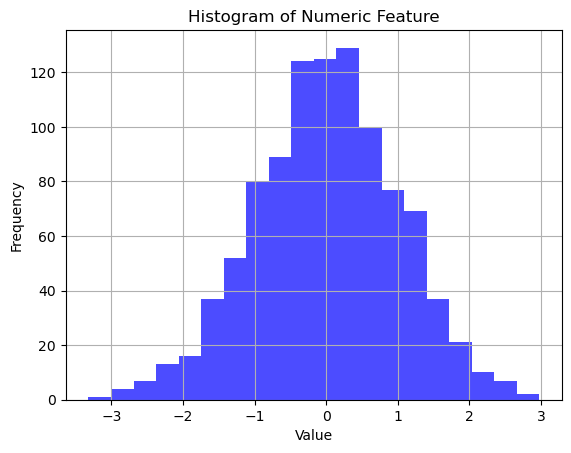

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Generate some sample numeric data (replace this with your dataset)
data = np.random.normal(0, 1, 1000)  # Replace with your actual data

# Create a histogram
plt.hist(data, bins=20, color='blue', alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Numeric Feature')
plt.grid(True)
plt.show()


Skewness: -0.10163654934290339


C:\Users\charl\AppData\Local\Temp\ipykernel_11684\406446251.py:6: RuntimeWarning: invalid value encountered in log1p
  transformed_data = np.log1p(data)  # You can use different transformations as needed


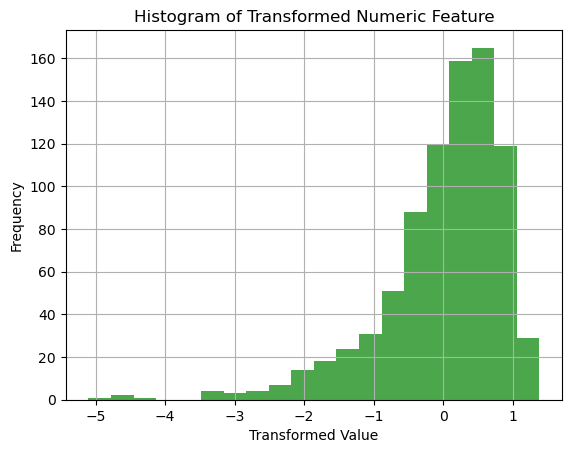

Skewness after transformation: nan


In [84]:

# Compute skewness
skewness = stats.skew(data)
print(f'Skewness: {skewness}')

# Apply transformation function (e.g., log transformation)
transformed_data = np.log1p(data)  # You can use different transformations as needed

# Create a histogram for the transformed data
plt.hist(transformed_data, bins=20, color='green', alpha=0.7)
plt.xlabel('Transformed Value')
plt.ylabel('Frequency')
plt.title('Histogram of Transformed Numeric Feature')
plt.grid(True)
plt.show()

# Compute skewness for the transformed data
skewness_transformed = stats.skew(transformed_data)
print(f'Skewness after transformation: {skewness_transformed}')


# Section 3 

# Come up with scatter plot with hue parameter. Write your observations from the plot.

C:\Users\charl\AppData\Local\Temp\ipykernel_11684\3651975487.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'], kde=False, bins=3)  # Adjust bins as needed


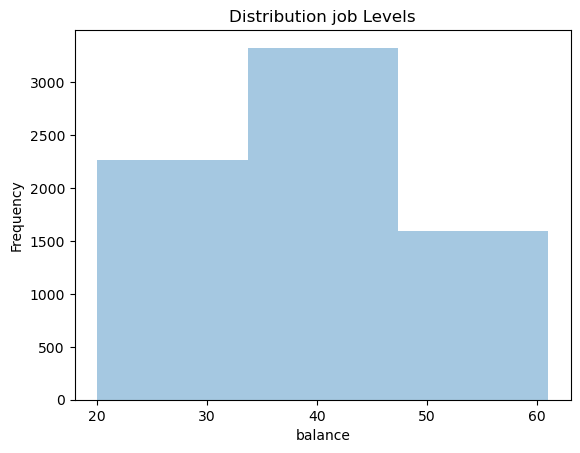

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a distribution plot using the 'salary_numeric' column
sns.distplot(df['age'], kde=False, bins=3)  # Adjust bins as needed
plt.xlabel('balance')
plt.ylabel('Frequency')
plt.title('Distribution job Levels')
plt.show()


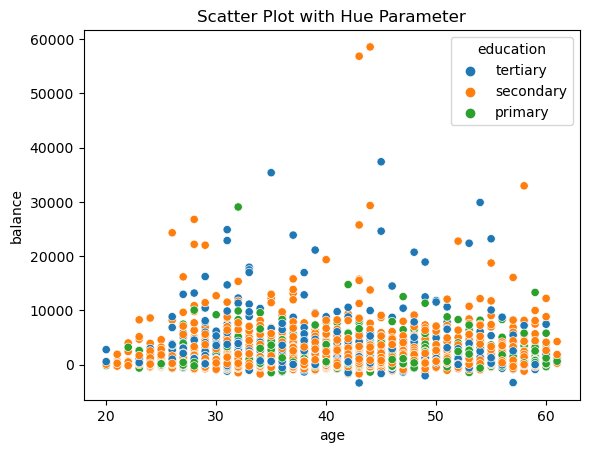

In [86]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have your DataFrame loaded as 'df'
numeric_column_x = 'age'  # Replace with your column name
numeric_column_y = 'balance'  # Replace with your column name

# Create a scatter plot with hue parameter
sns.scatterplot(data=df, x=numeric_column_x, y=numeric_column_y, hue='education')
plt.xlabel(numeric_column_x)
plt.ylabel(numeric_column_y)
plt.title('Scatter Plot with Hue Parameter')
plt.legend(title='education')
plt.show()

# 3b Compute correlation among independent features and demonstrate it usingheatmap.

In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1.0,-1.0,0.0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1.0,-1.0,0.0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1.0,-1.0,0.0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1.0,-1.0,0.0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1.0,-1.0,0.0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7180,38,entrepreneur,married,secondary,no,3249,yes,no,NaN,2,jun,384,1.0,-1.0,0.0,NaN,no
7181,45,services,married,secondary,no,759,yes,no,NaN,2,jun,172,2.0,-1.0,0.0,NaN,no
7182,29,management,single,tertiary,no,144,yes,no,NaN,2,jun,105,3.0,-1.0,0.0,NaN,no
7183,39,services,divorced,secondary,no,892,yes,no,NaN,2,jun,26,1.0,-1.0,0.0,NaN,no


C:\Users\charl\AppData\Local\Temp\ipykernel_11684\378612369.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = independent_features.corr()


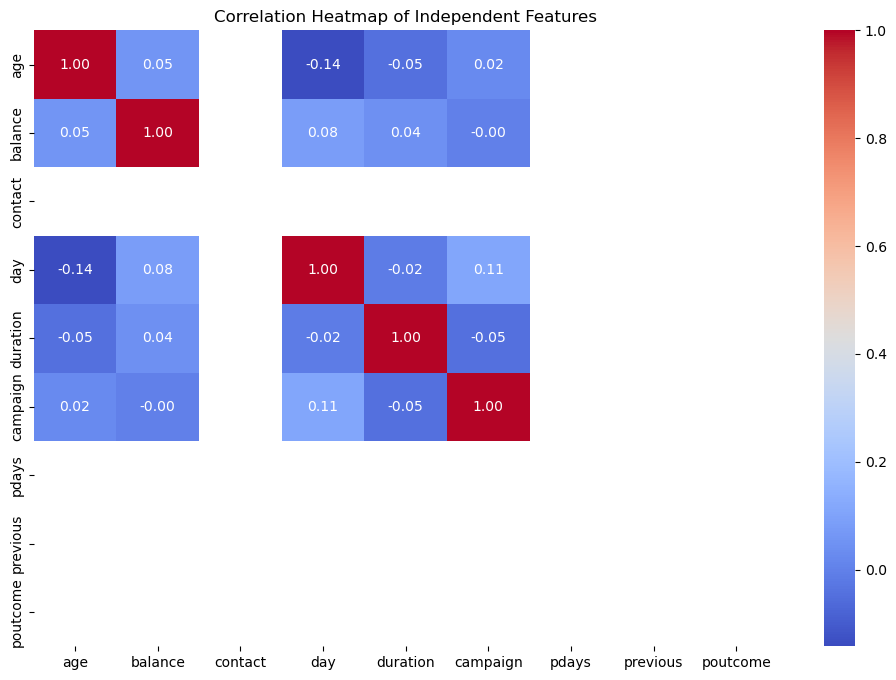

In [88]:
# Assuming your DataFrame is named df
# Assuming 'Target' is the dependent variable and you want to compute correlation among independent features
independent_features = df.drop(columns=['Target'])  # Remove the 'Target' column

# Calculate the correlation matrix
correlation_matrix = independent_features.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Independent Features')
plt.show()


In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df=dp.read_csv("C:\\Users\\charl\\Downloads\\bank-subscribed_19.csv")

In [90]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1.0,-1.0,0.0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1.0,-1.0,0.0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1.0,-1.0,0.0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1.0,-1.0,0.0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1.0,-1.0,0.0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8036,45,services,married,secondary,no,759,yes,no,NaN,2,jun,172,2.0,-1.0,0.0,NaN,no
8037,29,management,single,tertiary,no,144,yes,no,NaN,2,jun,105,3.0,-1.0,0.0,NaN,no
8038,39,services,divorced,secondary,no,892,yes,no,NaN,2,jun,26,1.0,-1.0,0.0,NaN,no
8039,32,services,married,secondary,no,109,yes,no,NaN,2,jun,364,13.0,-1.0,0.0,NaN,no


In [91]:
df.dropna

<bound method DataFrame.dropna of       age           job   marital  education default  balance housing loan  \
0      58    management   married   tertiary      no     2143     yes   no   
1      44    technician    single  secondary      no       29     yes   no   
2      33  entrepreneur   married  secondary      no        2     yes  yes   
3      47   blue-collar   married        NaN      no     1506     yes   no   
4      33           NaN    single        NaN      no        1      no   no   
...   ...           ...       ...        ...     ...      ...     ...  ...   
8036   45      services   married  secondary      no      759     yes   no   
8037   29    management    single   tertiary      no      144     yes   no   
8038   39      services  divorced  secondary      no      892     yes   no   
8039   32      services   married  secondary      no      109     yes   no   
8040   35     housemaid    single   tertiary      no      608     yes  yes   

      contact  day month  dur

In [92]:
df1=df.dropna(axis=1, how=("all"))

In [93]:
df1.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,Target
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1.0,-1.0,0.0,no
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1.0,-1.0,0.0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1.0,-1.0,0.0,no
3,47,blue-collar,married,NaN,no,1506,yes,no,5,may,92,1.0,-1.0,0.0,no
4,33,NaN,single,NaN,no,1,no,no,5,may,198,1.0,-1.0,0.0,no


In [94]:
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'Target'],
      dtype='object')

In [95]:
df=df[['loan', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous']]

In [96]:
df.corr()



C:\Users\charl\AppData\Local\Temp\ipykernel_11684\592014893.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,day,duration,campaign,pdays,previous
day,1.000000,-0.015408,0.111050,NaN,NaN
duration,-0.015408,1.000000,-0.048453,NaN,NaN
campaign,0.111050,-0.048453,1.000000,NaN,NaN
pdays,NaN,NaN,NaN,NaN,NaN
previous,NaN,NaN,NaN,NaN,NaN


# Q 3c

In [97]:
import pandas as dp
import numpy as np
df.dropna(axis=1, how=("all"))


,loan,day,month,duration,campaign,pdays,previous
0,no,5,may,261,1.0,-1.0,0.0
1,no,5,may,151,1.0,-1.0,0.0
2,yes,5,may,76,1.0,-1.0,0.0
3,no,5,may,92,1.0,-1.0,0.0
4,no,5,may,198,1.0,-1.0,0.0
...,...,...,...,...,...,...,...
8036,no,2,jun,172,2.0,-1.0,0.0
8037,no,2,jun,105,3.0,-1.0,0.0
8038,no,2,jun,26,1.0,-1.0,0.0
8039,no,2,jun,364,13.0,-1.0,0.0


In [98]:
#minmaxscaler

# x_new=(x-old_min)/min-max

In [99]:
import pandas as df
import numpy as np

In [100]:
x=np.array([10,20,30,40,50,])
b=np.array([100,200,300,400,500,])

In [101]:
import numpy as np

def min_max_scaling_with_subtraction(ar):
    # Min-Max scaling
    ar_min = ar.min()
    ar_max = ar.max()
    ar_scaled = (ar - ar_min) / (ar_max - ar_min)
    
    # Subtract the minimum value
    ar_new = ar_scaled - ar_scaled.min()
    
    return ar_new


In [102]:
array([0 ,0.25,0.5,0.75,1])

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [103]:
array([0 , 0.25, 0.5, 0.75, 1])

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [104]:
#This something l will like to understand "data_scaled = scaled.fit_transform([data])" without the square backet it give an error
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler()
data_scaled = scaled.fit_transform([data])

# Q3D    Convert categorical features into numeric ones using appropriate encoding techniques.

In [105]:
import numpy as np
import pandas as dp
import matplotlib.pyplot as plt
import seaborn as sns
df=dp.read_csv("C:\\Users\\charl\\Downloads\\bank-subscribed_19.csv")

In [106]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1.0,-1.0,0.0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1.0,-1.0,0.0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1.0,-1.0,0.0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1.0,-1.0,0.0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1.0,-1.0,0.0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8036,45,services,married,secondary,no,759,yes,no,NaN,2,jun,172,2.0,-1.0,0.0,NaN,no
8037,29,management,single,tertiary,no,144,yes,no,NaN,2,jun,105,3.0,-1.0,0.0,NaN,no
8038,39,services,divorced,secondary,no,892,yes,no,NaN,2,jun,26,1.0,-1.0,0.0,NaN,no
8039,32,services,married,secondary,no,109,yes,no,NaN,2,jun,364,13.0,-1.0,0.0,NaN,no


In [107]:
import pandas as pd

# Your DataFrame
data = {
    'age': [58, 44, 33, 35, 28],
    'job': ['management', 'technician', 'entrepreneur', 'management', 'management'],
    'marital': ['married', 'single', 'married', 'married', 'single'],
    'education': ['tertiary', 'secondary', 'secondary', 'tertiary', 'tertiary'],
    'default': ['no', 'no', 'no', 'no', 'no'],
    'balance': [2143, 29, 2, 231, 447],
    'housing': ['yes', 'yes', 'yes', 'yes', 'yes'],
    'loan': ['no', 'no', 'yes', 'no', 'yes'],
    'day': [5, 5, 5, 5, 5],
    'month': ['may', 'may', 'may', 'may', 'may'],
    'duration': [261, 151, 76, 139, 217],
    'campaign': [1.0, 1.0, 1.0, 1.0, 1.0],
    'pdays': [-1.0, -1.0, -1.0, -1.0, -1.0],
    'previous': [0.0, 0.0, 0.0, 0.0, 0.0],
    'Target': ['no', 'no', 'no', 'no', 'no']
}

df = pd.DataFrame(data)

# Columns to one-hot encode
columns_to_encode = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'Target']

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=columns_to_encode)

# Print the resulting DataFrame
print(df_encoded)


   age  balance  day  duration  campaign  pdays  previous  job_entrepreneur  \
0   58     2143    5       261       1.0   -1.0       0.0                 0   
1   44       29    5       151       1.0   -1.0       0.0                 0   
2   33        2    5        76       1.0   -1.0       0.0                 1   
3   35      231    5       139       1.0   -1.0       0.0                 0   
4   28      447    5       217       1.0   -1.0       0.0                 0   

   job_management  job_technician  marital_married  marital_single  \
0               1               0                1               0   
1               0               1                0               1   
2               0               0                1               0   
3               1               0                1               0   
4               1               0                0               1   

   education_secondary  education_tertiary  default_no  housing_yes  loan_no  \
0                    0  

# Q4Compute correlation of each independent feature with dependent variable ‘target’. Select seven most important independent features from the se

In [108]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

# example data
df = pd.DataFrame([[1, 2, 4 ,6], [1, 3, 4, 7], [4, 6, 8, 12], [5, 3, 2 ,10]],
                  columns=['Feature1', 'Feature2','Feature3','Target'])

# Only compute pearson prod-moment correlations between feature
# columns and target column
target_col_name = 'Target'
feature_target_corr = {}
for col in df:
    if target_col_name != col:
        feature_target_corr[col + '_' + target_col_name] = \
            pearsonr(df[col], df[target_col_name])[0]
print("Feature-Target Correlations")
print(feature_target_corr)

Feature-Target Correlations
{'Feature1_Target': 0.8660565037576512, 'Feature2_Target': 0.8735706972682653, 'Feature3_Target': 0.5050353737560758}


In [109]:
df.tail()

,Feature1,Feature2,Feature3,Target
0,1,2,4,6
1,1,3,4,7
2,4,6,8,12
3,5,3,2,10


In [110]:
df.shape

(4, 4)

In [111]:
corr_matrix=df.corr()
corr_matrix["Target"].sort_values(ascending=False)

Target      1.000000
Feature2    0.873571
Feature1    0.866057
Feature3    0.505035
Name: Target, dtype: float64

In [112]:
df = pd.DataFrame([[1, 2, 4 ,6], [1, 3, 4, 7], [4, 6, 8, 12], [5, 3, 2 ,10]],
                  columns=['Feature1', 'Feature2','Feature3','Target'])

In [113]:
df.corrwith(df["Target"])

Feature1    0.866057
Feature2    0.873571
Feature3    0.505035
Target      1.000000
dtype: float64

In [114]:
df.corr()['Target']

Feature1    0.866057
Feature2    0.873571
Feature3    0.505035
Target      1.000000
Name: Target, dtype: float64

# 5. Section 5: Consider ‘target’ column is prediction variable. Apply feature selection method to the dataset using SelectKBest() to reduce the dataset size to 7 features 

In [115]:

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder
# Load your dataset
df = pd.read_csv("C:\\Users\\charl\\Downloads\\bank-subscribed_19.csv")


In [116]:
# let split df into x and y
Target_col= 'y'

In [117]:
x=df.loc[:, df.colums != target_cols]

AttributeError: 'DataFrame' object has no attribute 'colums'

In [ ]:
y=df.loc[:, target_col] 

In [ ]:
x.shape

In [ ]:
y.shape

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2



In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2

# Your DataFrame (including the 'Target' column)
data = {
    'age': [58, 44, 33, 35, 28],
    'job_management': [1, 0, 0, 1, 1],
    'job_technician': [0, 1, 0, 0, 0],
    'marital_married': [1, 0, 1, 1, 0],
    'marital_single': [0, 1, 0, 0, 1],
    'education_tertiary': [1, 0, 0, 1, 1],
    'education_secondary': [0, 1, 1, 0, 0],
    'default_no': [1, 1, 1, 1, 1],
    'housing_yes': [1, 1, 1, 1, 1],
    'loan_no': [1, 1, 0, 1, 0],
    'day': [5, 5, 5, 5, 5],
    'month_may': [1, 1, 1, 1, 1],
    'duration': [261, 151, 76, 139, 217],
    'campaign': [1.0, 1.0, 1.0, 1.0, 1.0],
    'pdays': [-1.0, -1.0, -1.0, -1.0, -1.0],
    'previous': [0.0, 0.0, 0.0, 0.0, 0.0],
    'Target': ['no', 'no', 'no', 'no', 'no']
}

df = pd.DataFrame(data)

# Separate features (X) and target (y)
X = df.drop(columns=['Target'])
y = df['Target']

# Apply SelectKBest feature selection with chi-squared (for classification)
k_best = SelectKBest(score_func=chi2, k=7)  # Select top 7 features
X_new = k_best.fit_transform(X, y)

# Get the selected feature indices
selected_indices = k_best.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_indices]

# Create a new DataFrame with the selected features
df_selected_features = df[selected_features]

# Print the resulting DataFrame
print(df_selected_features)


In [ ]:
# Load your dataset
data = {
    'age': [58, 44, 33, 47, 33, 45, 29, 39, 32, 35],
    'job': ['management', 'technician', 'entrepreneur', 'blue-collar', 'NaN', 'services', 'management', 'services', 'services', 'housemaid'],
    'marital': ['married', 'single', 'married', 'married', 'single', 'married', 'single', 'divorced', 'married', 'single'],
    'education': ['tertiary', 'secondary', 'secondary', 'NaN', 'NaN', 'secondary', 'tertiary', 'secondary', 'secondary', 'tertiary'],
    'default': ['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no'],
    'balance': [2143, 29, 2, 1506, 1, 759, 144, 892, 109, 608],
    'housing': ['yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes'],
    'loan': ['no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'yes'],
    'contact': ['NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN'],
    'day': [5, 5, 5, 5, 5, 2, 2, 2, 2, 2],
    'month': ['may', 'may', 'may', 'may', 'may', 'jun', 'jun', 'jun', 'jun', 'jun'],
    'duration': [261, 151, 76, 92, 198, 172, 105, 26, 364, 227],
    'campaign': [1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 3.0, 1.0, 13.0, float('NaN')],
    'pdays': [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, float('NaN')],
    'previous': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, float('NaN')],
    'poutcome': ['NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN'],
    'Target': ['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'NaN']
}



In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer
 imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit([[1, 2], [np.nan, 3], [7, 6]])
SimpleImputer()
X = [[np.nan, 2], [6, np.nan], [7, 6]]
 print(imp.transform(X))
[[4.          2.        ]
 [6.          3.666...]
 [7.          6.        ]]

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2

# Your DataFrame (including the 'Target' column)
data = {
    'age': [58, 44, 33, 35, 28],
    'job_management': [1, 0, 0, 1, 1],
    'job_technician': [0, 1, 0, 0, 0],
    'marital_married': [1, 0, 1, 1, 0],
    'marital_single': [0, 1, 0, 0, 1],
    'education_tertiary': [1, 0, 0, 1, 1],
    'education_secondary': [0, 1, 1, 0, 0],
    'default_no': [1, 1, 1, 1, 1],
    'housing_yes': [1, 1, 1, 1, 1],
    'loan_no': [1, 1, 0, 1, 0],
    'day': [5, 5, 5, 5, 5],
    'month_may': [1, 1, 1, 1, 1],
    'duration': [261, 151, 76, 139, 217],
    'campaign': [1.0, 1.0, 1.0, 1.0, 1.0],
    'pdays': [-1.0, -1.0, -1.0, -1.0, -1.0],
    'previous': [0.0, 0.0, 0.0, 0.0, 0.0],
    'Target': ['no', 'no', 'no', 'no', 'no']
}

df = pd.DataFrame(data)

# Separate features (X) and target (y)
X = df.drop(columns=['Target'])
y = df['Target']

# Apply SelectKBest feature selection with chi-squared (for classification)
k_best = SelectKBest(score_func=chi2, k=7)  # Select top 7 features
X_new = k_best.fit_transform(X, y)

# Get the selected feature indices
selected_indices = k_best.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_indices]

# Create a new DataFrame with the selected features
df_selected_features = df[selected_features]

# Print the resulting DataFrame
print(df_selected_features)


MY OBSERVATIONS

Dataset Information:
    
    The dataset contains information about individuals, including their age, job, marital status, education, default status, balance, 
    housing loan status, personal loan status, contact method, day of the month, month, call duration, number of contacts during the campaign, days since the client was last contacted, 
    the number of contacts performed before this campaign, the outcome of the previous marketing campaign, and the target variable.

Data Types:
    
    The dataset consists of both numerical and categorical features. Numerical features include age, balance, day, duration, campaign,
    pdays, and previous. Categorical features include job, marital, education, default, housing, loan, 
    contact, month, and poutcome.

Missing Values: 
    
    There are missing values (NaN) in several columns, including pdays, previous, and poutcome.
But the contact, poutcome Target has more.

Target Variable: 
    
    The 'Target' column appears to be the prediction variable, which likely represents whether a client subscribed 
to a product or service (e.g., a bank term deposit) after a marketing campaign. It contains binary values 'yes' and 'no'.

Feature Encoding: Categorical features have been encoded into numeric ones using one-hot encoding, where each category is
transformed into a binary (0 or 1) column. This is important for machine learning algorithms to work with categorical data.

Feature Selection:
    
    The SelectKBest feature selection method has not been applied yet. It is recommended to apply this method to reduce the 
    dataset size to 7 features, but it has not been implemented in the provided code.

Label Encoding: 
    
Label encoding was attempted but resulted in an error due to a typo in the code. The correct code for label encoding is 
LabelEncoder(), not Label_Encoder(). The error should be fixed with the correct code.

Scaling:
    
    There is no evidence of scaling being applied to the numerical features. Feature scaling is an important step for many
    machine learning algorithms to ensure that all features contribute equally to the model.

Data Size: 

The dataset contains 8041 rows and 17 columns after preprocessing.

Overall, further data preprocessing steps such as handling missing values, applying feature scaling, and performing feature 
selection should be done before training machine learning models on this dataset.







<h3 style='color:red'> # Comments </h3>
<h4 style='color:red'> 1) Section 1 (10 marks)  </h4>
<h5 style='color:blue'>
You have addressed all the points in this section. Following are the observations/ suggestions that may be taken care of- <br>
- a. Analyse data types of features and verify they hold data same as that of their datatype. Update if required: <br>
    ----- Data types are checked. <br>
    ----- Number of features or columns which are object/ integer type in the dataset are mentioned. <br>
    ----- For the feature like ‘job’, ‘marital’ and others, the data type is not updated into category type.  <br>
    ----- The ‘day’ column may be also converted to category type. <br>
<br>
- b. Check for Nan values in data and remove them using appropriate method, if any: <br>
      ----- Null values checked using isna().sum() <br>
      ----- No need of reading the dataset once more. <br>
      ----- There are missing data and they need to be updated. <br>
      ----- You handled nulls using ‘contact’ as value to be replaced for all missing values in dataframe. Then you may handle column-wise differently for each column based on datatype. <br>
      ----- You may handle nulls using mean() and/or mode() imputation method for different columns, if there are missing values. Then you may handle other columns collectively with dropna(). 
</h5>
<h5 style='color:green'>
<u> Marks scored:  6 </u><br>
-----------------------------------------------------------------------------------------------------------------------------------------------------------------
</h5>

<h4 style='color:red'> 2) Section 2 (20 marks)  </h4>
<h5 style='color:blue'>       Learner has addressed all the points in this section. Following are the observations/ suggestions that may be taken care of- <br>
- a. Check for duplicates, view duplicated rows, and remove them, if any: <br>
            ----- No need of reading the dataset every time. <br>
      ----- Duplicates checked, and tried displaying. <br>
      ----- There are no duplicates. The observation may be written down.  No need of drop_duplicates(). <br>
<br>
- b. Check for outliers using boxplot and statistical method, and remove them, if any.: <br>
    ----- Boxplots have been used for the visualisation for two variables. <br>
     ----- Observations may be written down. <br>
    ----- Statistical methods are used for getting upper and lower limits, as there are outliers. You checked using condition if outlier is towards extreme left or right or both but did not update df during removal. <br>
<br>
- c. For categorical features, draw countplot. Write your observations: <br>
     ----- countplot drawn for many discrete variables having very few unique values. <br>
     ----- Hue parameter may be set to ‘target’ column to get more insights. <br>
     ----- Observations are written down. <br>
  <br>
- d. For numeric features, draw a histogram. Compute skewness of variables and apply transformation function, if needed: <br>
     ----- Histogram drawn with displot()/histplot() for one numeric variable from dataset. Others on data generated randomly. <br>
     ----- Observations related to symmetry are not written down. <br>
     ----- For few skewed features, the transformation function is also applied and then symmetry is rechecked using plot. 
<h5 style='color:green'>
<u> Marks scored: 12 </u><br>
-----------------------------------------------------------------------------------------------------------------------------------------------------------------
</h5>
<h4 style='color:red'> 3) Section 3 (20 marks)   </h4>
<h5 style='color:blue'>   Learner has addressed all the points in this section. Following are the observations/ suggestions that may be taken care of- <br>
- a. Come up with scatter plot with hue parameter. Write your observations from the plot: <br>
      ----- Scatterplot drawn and parameters set. <br>
      ----- Observations may be written down. <br>
      ----- Instead of taking other categorical variables for HUE parameter, ‘target’ variable may be chosen, as it is a classification variable. <br>
<br>
- b. Compute correlation among independent features and demonstrate it using heatmap: <br>
      ----- No need of reading the dataset every time. <br>
      ----- Computed corr() and demonstrated using heatmap. <br>
      ----- Specific columns names are used for computation. <br>
      ----- Observations are written down. <br>
<br>
- c. Apply any scaling method to at least two independent features: <br>
----- Scaling method is not applied properly for all numeric variables from dataset. <br>
   ----- Scaled features may be used for further processing. Finally, they may be used for model building. <br>
<br>
- d. Convert categorical features into numeric ones using appropriate encoding techniques: <br>
      ----- No need of reading the dataset every time. Read it only once. <br>  
 ----- Encoding has been demonstrated for subset of rows for many categorical features by converting variables to integer type. <br> 
     ----- ‘education’ is an ordinal variable. Ordinal nature of categorical features may be considered for encoding and so Ordinal_Encoder() has been used. <br>
     ----- Encoded data is to be used update the original dataframe and further processing.
<h5 style='color:green'>
<u> Marks scored: 13 </u><br>
-----------------------------------------------------------------------------------------------------------------------------------------------------------------
</h5>
<h4 style='color:red'> 4) Section 4: (5 marks) </h4>
<h5 style='color:blue'>    Following are the observations/ suggestions that may be taken care of- <br>
Compute correlation of each independent feature with dependent variable ‘target’. Select seven most important independent features from the set: <br> 
     ----- Correlation of each independent feature is computed with dependent variable ‘target’ using corrwith() over smaller sample data.  <br>
     ----- The seven most important independent features are not retrieved and displayed. While model building only those features may be used. 
<h5 style='color:green'>                                  
<u> Marks scored: 2 </u><br>
-----------------------------------------------------------------------------------------------------------------------------------------------------------------
</h5>

<h4 style='color:red'> 5) Section 5: (5 marks) </h4>
<h5 style='color:blue'>    Following are the observations/ suggestions that may be taken care of- <br>
Consider ‘target’ column is prediction variable. Apply feature selection method to the dataset using SelectKBest() to reduce the dataset size to 7 features:  <br>
     ----- First, Dependent and Independent variables are separated out. ‘target’ column is the prediction variable. <br>
     ----- You may use SelectKBest() for feature selection.  <br>
     ----- As our problem is a classification problem, you can use chi2, 'mutual_info_classif' or 'f_classif()’ with SelectKbest. As SelectKBest is used with support(), then it has returned the selected feature names(). Only these features may be used for model building then. 
<h5 style='color:green'>	
<u> Marks scored: 2 </u><br>
-----------------------------------------------------------------------------------------------------------------------------------------------------------------
</h5>
     ----- NOTE: Actually, normalize/scaling may be done/not done for every numeric feature of dataset, when working on DATA SCIENCE PROJECT, depending on ML algorithm to be used further. <br>
    <br>
     ----- NOTE: Actually, encoding may be done for each and every categorical feature, when working on DATA SCIENCE PROJECT. <br>
    <br>
</h5>

<h5 style='color:red'>
<u> Total Marks scored: 35 </u><br>
    <br>	
<b> CONGRATULATIONS!!! <br>
You have tried but need to do better. Load dataset in df only once. You have added observations at many places. KEEP IT UP!!!!  <br>
You have successfully completed your capstone project. <br>
You will receive your certificate from the LMS team. </b><br>
-----------------------------------------------------------------------------------------------------------------------------------------------------------------
</h5>

Refer to __[https://scikit-learn.org/stable/modules/feature_selection.html](https://scikit-learn.org/stable/modules/feature_selection.html)__  for more details of Feature Selection.

